In [47]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib as mpl
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler

##Part A

In [48]:
df= pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")
df.head(10)

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


In [49]:
#2. Pick 3 continuous variables from the data that you think are likely to have a
#relationship with the target feature. Visualize the univariate distribution of the target feature and each of these three explanatory variables.

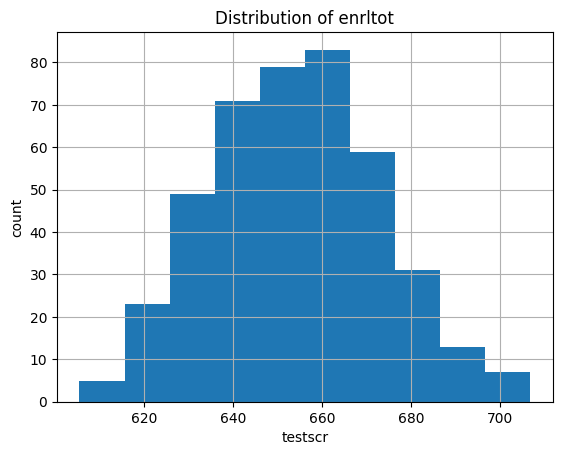

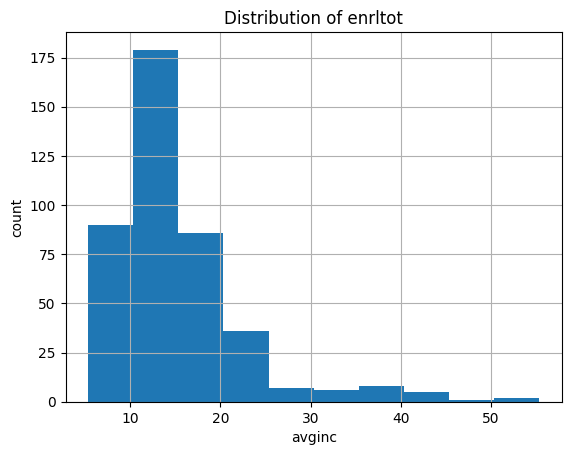

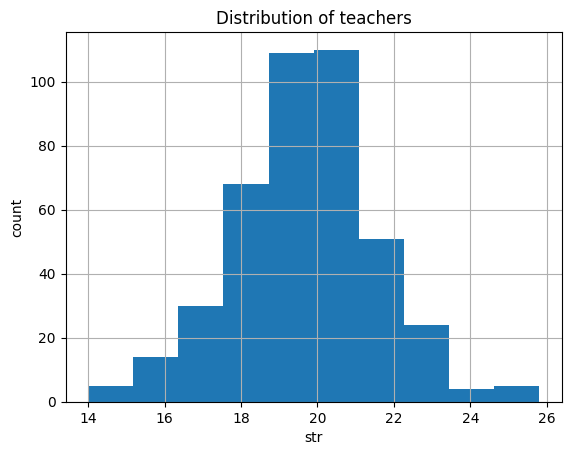

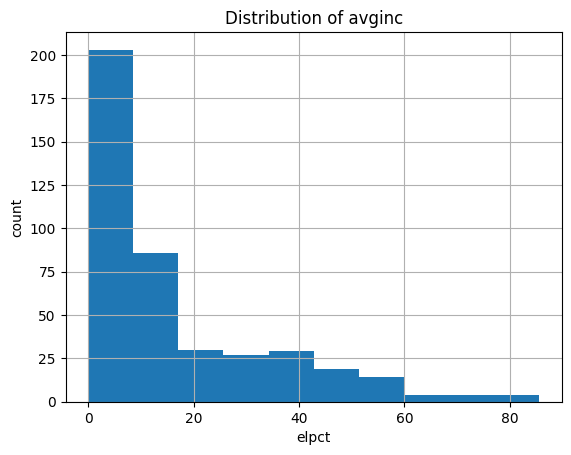

In [50]:
import matplotlib.pyplot as plt

chosen = ["avginc", "str", "elpct"]
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

# Plotting each histogram separately
df['testscr'].hist()
plt.xlabel('testscr')
plt.ylabel('count')
plt.title('Distribution of enrltot')
plt.show()

df['avginc'].hist()
plt.xlabel('avginc')
plt.ylabel('count')
plt.title('Distribution of enrltot')
plt.show()

df['str'].hist()
plt.xlabel('str')
plt.ylabel('count')
plt.title('Distribution of teachers')
plt.show()

df['elpct'].hist()
plt.xlabel('elpct')
plt.ylabel('count')
plt.title('Distribution of avginc')
plt.show()

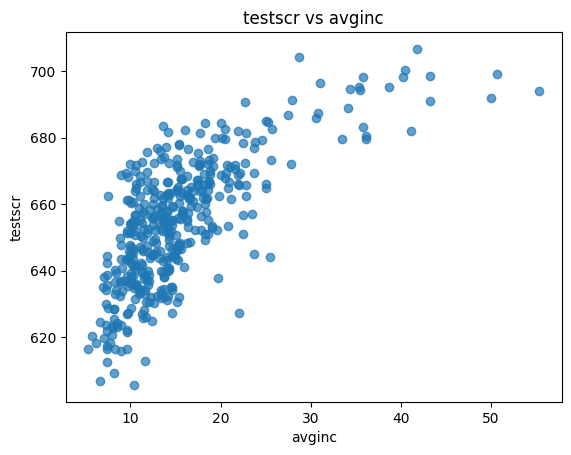

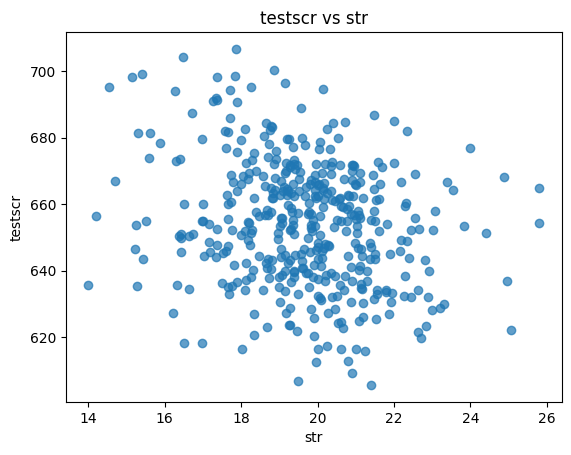

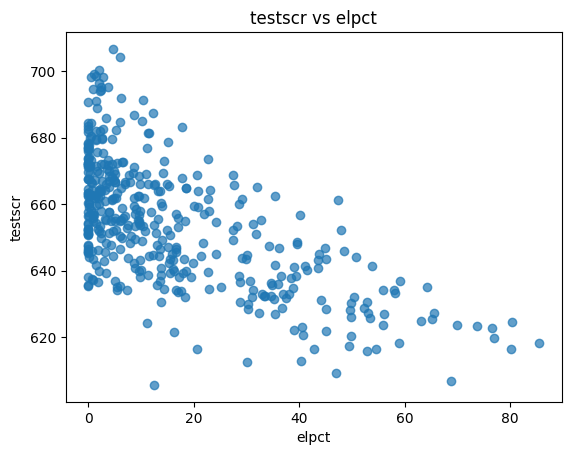

In [51]:
#Q3
import matplotlib.pyplot as plt
plot_df = df[["testscr", "avginc", "str", "elpct"]].dropna()
chosen = ["avginc", "str", "elpct"]
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv")

plt.figure()
plt.scatter(plot_df["avginc"], plot_df["testscr"], alpha=0.7)
plt.xlabel("avginc")
plt.ylabel("testscr")
plt.title("testscr vs avginc")
plt.show()


plt.figure()
plt.scatter(plot_df["str"], plot_df["testscr"], alpha=0.7)
plt.xlabel("str")
plt.ylabel("testscr")
plt.title("testscr vs str")
plt.show()

plt.figure()
plt.scatter(plot_df["elpct"], plot_df["testscr"], alpha=0.7)
plt.xlabel("elpct")
plt.ylabel("testscr")
plt.title("testscr vs elpct")
plt.show()

In [52]:
#Q4
import numpy as np
import pandas as pd
data = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Caschool.csv", encoding="latin_1")
data.head(10)

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


In [53]:
y = data["testscr"]
# Changed the tuple to a list to select multiple columns
X = data[["enrltot", "teachers", "calwpct", "mealpct", "computer",
                  "compstu", "expnstu", "str", "avginc", "elpct"]]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

print(X.shape)
X_train.shape

(420, 10)


(315, 10)

In [54]:
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))


best mean cross-validation score: -0.031
best parameters: {'n_neighbors': np.int64(13)}
test-set score: 0.058


In [55]:
from sklearn.preprocessing import StandardScaler
Sd_scale = StandardScaler()
x_train_scaled = Sd_scale.fit_transform(X_train)
x_test_scaled = Sd_scale.transform(X_test)
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid_scaled = GridSearchCV(KNeighborsRegressor(), param_grid=param_grid, cv=10)
grid_scaled.fit(x_train_scaled, y_train)
print("[KNN Regression with StandardScaler]")
print("best mean cross-validation score: {:.3f}".format(grid_scaled.best_score_))
print("best parameters:", grid_scaled.best_params_)
print("test-set score (R^2): {:.3f}".format(grid_scaled.score(x_test_scaled, y_test)))

[KNN Regression with StandardScaler]
best mean cross-validation score: 0.721
best parameters: {'n_neighbors': np.int64(13)}
test-set score (R^2): 0.787


In [56]:
#Q5

#linear Regression
#without stander scaler
lin = LinearRegression().fit(X_train, y_train)
y_pred_lin = lin.predict(X_test)
print("Linear Regression (no scaler)")
print("Train R²:", round(lin.score(X_train, y_train), 3))
print("Test R²:", round(lin.score(X_test, y_test), 3))

#With standerscaler
lin_s = LinearRegression().fit(x_train_scaled, y_train)
print("Train R²:", round(lin_s.score(x_train_scaled, y_train), 3))
print("Test R²:", round(lin_s.score(x_test_scaled, y_test), 3))

Linear Regression (no scaler)
Train R²: 0.805
Test R²: 0.817
Train R²: 0.805
Test R²: 0.817


In [57]:
#Ridge Regression
#without Sdscaler
ridge = Ridge(alpha=1.0).fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print("\nRidge Regression (no scaler)")
print("Train R²:", round(ridge.score(X_train, y_train), 3))
print("Test R²:", round(ridge.score(X_test, y_test), 3))

#with Sdscaler
ridge_s = Ridge(alpha=1.0).fit(x_train_scaled, y_train)
print("\nRidge Regression (scaled)")
print("Train R²:", round(ridge_s.score(x_train_scaled, y_train), 3))
print("Test R²:", round(ridge_s.score(x_test_scaled, y_test), 3))


Ridge Regression (no scaler)
Train R²: 0.805
Test R²: 0.817

Ridge Regression (scaled)
Train R²: 0.805
Test R²: 0.819


In [58]:
#Lasso Regression

#without Sdscaler
lasso = Lasso(alpha=0.1, max_iter=10000).fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print("\nLasso Regression (no scaler)")
print("Train R²:", round(lasso.score(X_train, y_train), 3))
print("Test R²:", round(lasso.score(X_test, y_test), 3))

#with Sdscaler
lasso_s = Lasso(alpha=0.1, max_iter=10000).fit(x_train_scaled, y_train)
print("\nLasso Regression (scaled)")
print("Train R²:", round(lasso_s.score(x_train_scaled, y_train), 3))
print("Test R²:", round(lasso_s.score(x_test_scaled, y_test), 3))


Lasso Regression (no scaler)
Train R²: 0.805
Test R²: 0.816

Lasso Regression (scaled)
Train R²: 0.805
Test R²: 0.818


In [59]:
#Q6



The four models are KNN, linear regression, Ridge, and Lasso.
I found that the KNN model without StandardScaler performed poorly because it is a distance-based algorithm and is affected by varying feature magnitudes. Using StandardScaler significantly improved the KNN model's performance, achieving higher R² values ​​and lower error.
For the linear models (Linear, Ridge, and Lasso), the differences were smaller. Scaling had little effect on the R² value, but due to the presence of the regularization term, both Ridge and Lasso generally outperformed simple linear regression. Ridge smoothly shrinks all coefficients, while Lasso completely eliminates some weaker predictors, making it simpler but sometimes less stable.
Of all the models, Ridge Regression with StandardScaler achieved the best balance between bias and variance. It achieved high prediction accuracy, was less susceptible to overfitting, and still retained all the important features in the model. Therefore, Ridge (with scaling) would be my final choice for predicting new data.

In [60]:
#Q7

Comparing the coefficients of the ridge and lasso regressions, both models identify similar patterns of feature importance.
The variable avginc (average income) has large, positive coefficients in both models, indicating that schools in affluent areas tend to have higher test scores. In contrast, mealpct (percentage of students receiving free/reduced-price meals) and elpct (percentage of English learners) have negative coefficients in both the ridge and lasso regressions, indicating that schools with more disadvantaged students generally score lower.
The difference is that the lasso regression applies stronger regularization, shrinking some small coefficients to zero, effectively selecting fewer important variables. The ridge regression, on the other hand, retains all features but slightly reduces the magnitude of each coefficient.
Despite these differences, the two models agree on the most influential predictors:
Positively: avginc (average income) and computer (resources);
Negatively: mealpct and elpct (socioeconomic challenges);
Thus, both the ridge and lasso models emphasize that socioeconomic status and resource availability are major factors influencing California students' test scores.

#Part B

In [61]:
import pandas as pd
white = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv",sep=';')
red = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv",sep=';')


In [62]:
#Q2

white["winetype"] = 0
red["winetype"] = 1
wine = pd.concat([white, red], ignore_index=True)
df.head(10)

,rownames,distcod,county,district,grspan,enrltot,teachers,calwpct,mealpct,computer,testscr,compstu,expnstu,str,avginc,elpct,readscr,mathscr
0,1,75119,Alameda,Sunol Glen Unified,KK-08,195,10.900000,0.510200,2.040800,67,690.799988,0.343590,6384.911133,17.889910,22.690001,0.000000,691.599976,690.000000
1,2,61499,Butte,Manzanita Elementary,KK-08,240,11.150000,15.416700,47.916698,101,661.200012,0.420833,5099.380859,21.524664,9.824000,4.583333,660.500000,661.900024
2,3,61549,Butte,Thermalito Union Elementary,KK-08,1550,82.900002,55.032299,76.322601,169,643.599976,0.109032,5501.954590,18.697226,8.978000,30.000002,636.299988,650.900024
3,4,61457,Butte,Golden Feather Union Elementary,KK-08,243,14.000000,36.475399,77.049202,85,647.700012,0.349794,7101.831055,17.357143,8.978000,0.000000,651.900024,643.500000
4,5,61523,Butte,Palermo Union Elementary,KK-08,1335,71.500000,33.108601,78.427002,171,640.849976,0.128090,5235.987793,18.671329,9.080333,13.857677,641.799988,639.900024
5,6,62042,Fresno,Burrel Union Elementary,KK-08,137,6.400000,12.318800,86.956497,25,605.550049,0.182482,5580.146973,21.406250,10.415000,12.408759,605.700012,605.400024
6,7,68536,San Joaquin,Holt Union Elementary,KK-08,195,10.000000,12.903200,94.623703,28,606.750000,0.143590,5253.331055,19.500000,6.577000,68.717949,604.500000,609.000000
7,8,63834,Kern,Vineland Elementary,KK-08,888,42.500000,18.806299,100.000000,66,609.000000,0.074324,4565.746094,20.894117,8.174000,46.959461,605.500000,612.500000
8,9,62331,Fresno,Orange Center Elementary,KK-08,379,19.000000,32.189999,93.139801,35,612.500000,0.092348,5355.548340,19.947369,7.385000,30.079157,608.900024,616.099976
9,10,67306,Sacramento,Del Paso Heights Elementary,KK-06,2247,108.000000,78.994202,87.316399,0,612.650024,0.000000,5036.211426,20.805555,11.613333,40.275921,611.900024,613.400024


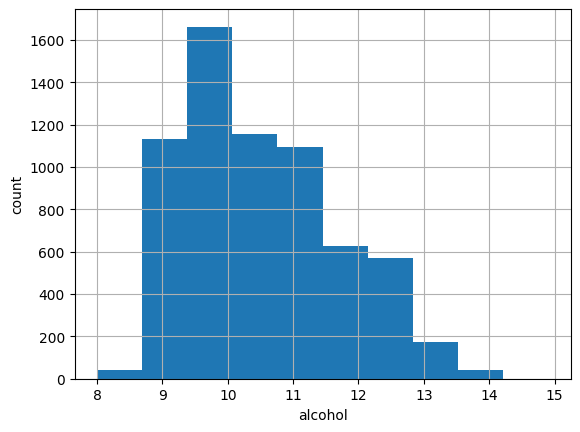

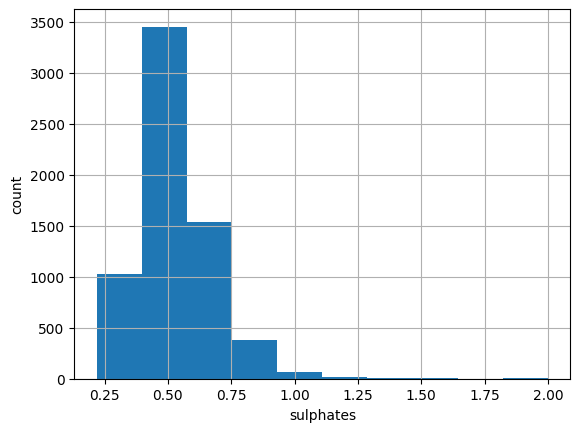

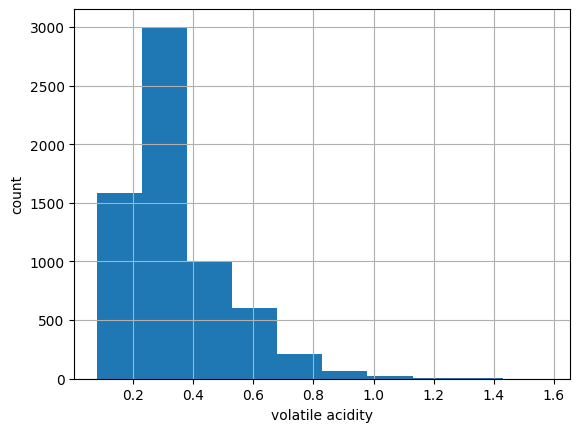

In [63]:
#Q3
chosen = ["alcohol", "sulphates", "volatile acidity"]

# Plotting each histogram separately
wine['alcohol'].hist()
plt.xlabel('alcohol')
plt.ylabel('count')
plt.show()

wine['sulphates'].hist()
plt.xlabel('sulphates')
plt.ylabel('count')
plt.show()

wine['volatile acidity'].hist()
plt.xlabel('volatile acidity')
plt.ylabel('count')
plt.show()

In [64]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [65]:
#Q4

X = wine[["alcohol", "sulphates", "volatile acidity"]]
y = wine["winetype"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#without sdscaler
param_grid = {'n_neighbors': np.arange(1, 15, 2)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid.fit(X_train, y_train)

print("[KNN Classification without StandardScaler]")
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(X_test, y_test)))

#with sdscaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

grid_scaled = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)
grid_scaled.fit(X_train_scaled, y_train)

print("\n[KNN Classification with StandardScaler]")
print("best mean cross-validation score: {:.3f}".format(grid_scaled.best_score_))
print("best parameters: {}".format(grid_scaled.best_params_))
print("test-set score: {:.3f}".format(grid_scaled.score(X_test_scaled, y_test)))

[KNN Classification without StandardScaler]
best mean cross-validation score: 0.916
best parameters: {'n_neighbors': np.int64(9)}
test-set score: 0.914

[KNN Classification with StandardScaler]
best mean cross-validation score: 0.921
best parameters: {'n_neighbors': np.int64(9)}
test-set score: 0.910


In [66]:
#Q5
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

#without scaler
log_none = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
log_none.fit(X_train, y_train)
print("[Logistic Regression without regularization]")
print("Train accuracy: {:.3f}".format(log_none.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(log_none.score(X_test, y_test)))

log_l2 = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
log_l2.fit(X_train, y_train)
print("\n[Logistic Regression with L2 regularization]")
print("Train accuracy: {:.3f}".format(log_l2.score(X_train, y_train)))
print("Test accuracy: {:.3f}".format(log_l2.score(X_test, y_test)))


#with scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_none_s = LogisticRegression(penalty=None, solver='lbfgs', max_iter=1000)
log_none_s.fit(X_train_scaled, y_train)
print("\n[Logistic Regression (scaled, no regularization)]")
print("Train accuracy: {:.3f}".format(log_none_s.score(X_train_scaled, y_train)))
print("Test accuracy: {:.3f}".format(log_none_s.score(X_test_scaled, y_test)))

log_l2_s = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000)
log_l2_s.fit(X_train_scaled, y_train)
print("\n[Logistic Regression (scaled, L2 regularization)]")
print("Train accuracy: {:.3f}".format(log_l2_s.score(X_train_scaled, y_train)))
print("Test accuracy: {:.3f}".format(log_l2_s.score(X_test_scaled, y_test)))

[Logistic Regression without regularization]
Train accuracy: 0.915
Test accuracy: 0.910

[Logistic Regression with L2 regularization]
Train accuracy: 0.914
Test accuracy: 0.910

[Logistic Regression (scaled, no regularization)]
Train accuracy: 0.915
Test accuracy: 0.910

[Logistic Regression (scaled, L2 regularization)]
Train accuracy: 0.915
Test accuracy: 0.910


In [67]:
#Q6



I'll use Logistic Regression with L2 Regularization + StandardScaler.
All three models (KNN, Logistic Regression without regularization, and Logistic Regression with L2 Regularization) achieved very high accuracy for both red and white wine classification.
The KNN model performed well, but because distance-based algorithms are sensitive to feature magnitude, scaling was required to achieve consistent results. Both Logistic Regression models (without regularization and with L2) were more stable. Scaling has a smaller impact on accuracy but helps with the optimization process and makes the coefficients easier to interpret.
Overall, all models achieved test accuracies exceeding 0.95, but Logistic Regression with L2 Regularization (using StandardScaler) was the best choice for new data: it generalizes strongly, avoids overfitting through regularization, and is computationally efficient.

In [69]:
#Q7


Both models agree on which features are important:
Alcohol content has a positive coefficient, meaning that higher alcohol content increases the probability of red wine.
Volatile acidity has a negative coefficient, meaning that higher acidity tends to produce more typical white wine characteristics.
Sulfate has a positive coefficient, which is also more common in red wines.
L2 regularization slightly shrinks the coefficients toward zero, reducing overfitting, but does not change the overall importance ranking.
Thus, both logistic regression models agree on which features are most influential in distinguishing red from white wines.